<a href="https://colab.research.google.com/github/advait-t/IPL_Datasets/blob/main/fantasy_bowling_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
from sklearn.decomposition import PCA

import seaborn as sns

from sklearn.metrics import r2_score

import pickle as pk

from keras.models import load_model

from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
bowl = pd.read_csv('/content/Bowling Updated .csv')

In [ ]:
bowl = bowl.drop(['Match_id','Team','Season','Econ'], axis = 1)

In [ ]:
bowl1 = bowl
bowl1.to_csv("Final_Bowling.csv")

In [ ]:
bowl['economy']=bowl['Runs']/bowl['Overs']
bowl['economy'] = bowl['economy'].round(2)
bowl['economy'] = bowl['economy'].replace([np.inf, -np.inf], 0)

In [ ]:
bowl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7618 entries, 0 to 7617
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          7618 non-null   object 
 1   Overs           7618 non-null   float64
 2   Maidens         7618 non-null   int64  
 3   Runs            7618 non-null   int64  
 4   Wickets         7618 non-null   int64  
 5   Dots            7618 non-null   int64  
 6   4s              7618 non-null   int64  
 7   6s              7618 non-null   int64  
 8   Wd              7618 non-null   int64  
 9   Nb              7618 non-null   int64  
 10  Fantasy_Points  7618 non-null   int64  
 11  Teams           7618 non-null   object 
 12  Opponent_Team   7618 non-null   object 
 13  Match_Location  7618 non-null   object 
 14  Toss_Winner     7618 non-null   object 
 15  Choose_to       7618 non-null   object 
 16  economy         7618 non-null   float64
dtypes: float64(2), int64(9), object(6

In [ ]:
bowl.head()

,Player,Overs,Maidens,Runs,Wickets,Dots,4s,6s,Wd,Nb,Fantasy_Points,Teams,Opponent_Team,Match_Location,Toss_Winner,Choose_to,economy
0,Praveen Kumar,4.0,0,38,0,13,3,3,1,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,"M.Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,field,9.50
1,Zaheer Khan,4.0,0,38,1,8,3,2,0,0,25,Royal Challengers Bangalore,Kolkata Knight Riders,"M.Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,field,9.50
2,Ashley Noffke,4.0,0,40,1,7,2,2,1,0,25,Royal Challengers Bangalore,Kolkata Knight Riders,"M.Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,field,10.00
3,Jacques Kallis,4.0,0,48,1,9,5,3,1,0,19,Royal Challengers Bangalore,Kolkata Knight Riders,"M.Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,field,12.00
4,Sunil Joshi,3.0,0,26,0,4,0,2,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,"M.Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,field,8.67


In [ ]:
bowl = bowl.reset_index()

In [ ]:
le2 = preprocessing.LabelEncoder()
bowl['Player']= le2.fit_transform(bowl['Player'])
print(bowl['Player'].unique())
pk.dump(le2,open('bowl_player_le2.pk','wb'))

[265 399  46 139 356  69  47 135  17 347 192  68 350 144 132 174 259 392
 138 203 236 249 159 119  67 115 277  91 230 326 345 325 396 103 387  52
  44 328  99 308 124   6 231 220  93  73 268 315 312  31 261 250 219 393
 320 111 386 234 105 384 346  35 245 344 397 338  87  20 100 388 389 117
 381 376 260 200 248 110  72 106 294 359 382 190  71 112 102  23 337 131
 279 246   3 287 367 295  27  15 365  29 191 171 375 157 104   1 395 385
 116 127  77 226 180 297 284 202  41 280 168 336  65 304 292 154 354 121
 324   7 317 101 299 369  24 228 193   4  76 348  33  16 160 208  30 394
  75 286 269 147 329  25   5 300  22 276 293 165 313  64 323 183 355 377
 322  12 271 298 366 179 255  74 225 341 108 153  14  10 114 213 196 351
   0 353 242 368 358  48  88  43 275 143  21 391 217 239 302 319  61 161
 349 301 321 256 331 141 378 238 156 244 262 134  60  62   9  26 247 120
  36 303 142 340 288 118 204 207 181 109 129  38  89 362 113 357  66 278
 253 380  82  28  45  51  18 257 197 291 272 211  5

In [ ]:
sc = StandardScaler()
col_names = ['Overs','Maidens','Runs','Wickets','Dots','4s','6s','Wd','Nb','economy']
features = bowl[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
bowl[col_names] = features
pk.dump(scaler,open('bowl_scaler_sc.pk','wb'))

In [ ]:
teams_le = pk.load(open('teams_le (1).pk','rb'))
# player_le2 = pk.load(open('bowl_player_le2.pk','rb'))
choose_le4 = pk.load(open('choose_le4.pk','rb'))
location_le5 = pk.load(open('location_le5.pk','rb'))

In [ ]:
bowl['Teams']=teams_le.transform(bowl['Teams'])
bowl['Opponent_Team']=teams_le.transform(bowl['Opponent_Team'])
bowl['Toss_Winner']=teams_le.transform(bowl['Toss_Winner'])
bowl['Match_Location']=location_le5.transform(bowl['Match_Location'])
# bowl['Player']=player_le2.transform(bowl['Player'])
bowl['Choose_to']=choose_le4.transform(bowl['Choose_to'])

In [ ]:
x_bowl = bowl.drop('Fantasy_Points', axis = 1)
y_bowl = bowl['Fantasy_Points']

In [ ]:
pca=PCA()
pca = pca.fit(x_bowl)
x_bowl=pd.DataFrame(pca.transform(x_bowl))
pk.dump(pca,open('bowl_pca.pk','wb'))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_bowl, y_bowl, test_size=0.20, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6094, 17)
(6094,)
(1524, 17)
(1524,)


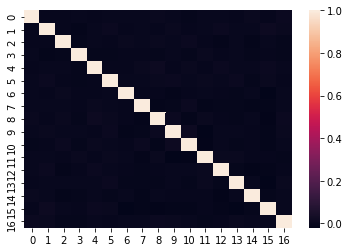

In [ ]:
sns.heatmap(x_train.corr())

In [ ]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
4054,245.440346,-79.317097,1.076329,-4.507838,-8.529386,-4.195863,-0.924766,-1.231183,-0.732294,-0.020877,0.275431,0.076285,-0.464690,-0.267168,0.599877,0.139421,-0.149723
3011,-797.519804,-20.510896,8.643601,4.098514,-2.235016,0.249702,-0.554282,-1.512714,0.608439,-0.828624,0.110861,-0.966530,1.501533,0.171986,-0.436087,-0.207876,0.010976
6357,2548.546124,51.889941,-7.892357,-6.952292,-1.911202,0.064239,0.665923,0.948164,-0.084576,-0.047332,-0.768830,-0.289435,0.533185,-0.624412,0.642101,0.059110,0.194214
6822,3013.513833,17.536042,8.748752,-1.378383,-2.027605,-1.094296,-0.366426,0.528880,-0.717942,-0.200489,0.988726,0.902627,-1.012792,-0.478477,-0.449902,0.217023,-0.125102
7227,3418.540915,46.221927,-10.529749,-3.580452,-1.271007,1.499203,-1.231113,-1.839197,-0.704687,0.316795,-0.703057,-0.577516,-0.636535,0.832915,1.051212,-0.003133,-0.066910


In [ ]:
mc = ModelCheckpoint(monitor = 'val_loss', verbose=2,mode = 'min', filepath='/content/bowl_nn_best.h5', save_best_only = True)
es = EarlyStopping(monitor='val_loss', mode = 'min', patience=50)

In [ ]:
# nn = models.Sequential()
# nn.add(layers.Dense(512, activation = 'relu', input_shape = (9,)))
# nn.add(layers.Dense(256, activation = 'relu'))
# nn.add(layers.Dense(128, activation = 'relu'))
# nn.add(layers.Dense(1))
# nn.summary()


NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               2304      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 167,169
Trainable params: 167,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=[mc,es])

Epoch 1/500
153/153 [==============================] - 1s 5ms/step - loss: 22.9873 - mean_absolute_error: 22.9873 - val_loss: 22.1455 - val_mean_absolute_error: 22.1455

Epoch 00001: val_loss improved from inf to 22.14554, saving model to /content/bowl_nn_best.h5
Epoch 2/500
153/153 [==============================] - 1s 4ms/step - loss: 21.6975 - mean_absolute_error: 21.6975 - val_loss: 21.2985 - val_mean_absolute_error: 21.2985

Epoch 00002: val_loss improved from 22.14554 to 21.29846, saving model to /content/bowl_nn_best.h5
Epoch 3/500
153/153 [==============================] - 1s 4ms/step - loss: 21.0388 - mean_absolute_error: 21.0388 - val_loss: 20.1789 - val_mean_absolute_error: 20.1789

Epoch 00003: val_loss improved from 21.29846 to 20.17887, saving model to /content/bowl_nn_best.h5
Epoch 4/500
153/153 [==============================] - 1s 4ms/step - loss: 19.9157 - mean_absolute_error: 19.9157 - val_loss: 15.6427 - val_mean_absolute_error: 15.6427

Epoch 00004: val_loss improv

In [ ]:
# Load wights file of the best model :
weights_file = '/content/bowl_nn_best.h5' # choose the best checkpoint 
NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
test_loss, test_acc = NN_model.evaluate(x_test, y_test)

48/48 [==============================] - 0s 1ms/step - loss: 0.7795 - mean_absolute_error: 0.7795


In [ ]:
pred = NN_model.predict(x_test)
a = r2_score(y_test, pred)
print(a*100, "%")
print(pred)

99.5926771745582 %
[[-1.8854782e-02]
 [ 2.5674294e+01]
 [-1.7904967e-02]
 ...
 [-1.1471942e-02]
 [-2.2917882e-02]
 [ 2.3189001e+01]]


In [ ]:
from keras.models import load_model
pca = pk.load(open('bowl_pca.pk','rb'))
nn_model = load_model('bowl_nn_best.h5')
teams_le = pk.load(open('teams_le (1).pk','rb'))
player_le2 = pk.load(open('bowl_player_le2.pk','rb'))
choose_le4 = pk.load(open('choose_le4.pk','rb'))
location_le5 = pk.load(open('location_le5.pk','rb'))
scaler_sc = pk.load(open('bowl_scaler_sc.pk','rb'))

In [ ]:
def player_history(Data, Player, Team, Toss=0, Selection=0, Statium=0):
  Data = Data.drop('Fantasy_Points', axis = 1)
  temp = Data[Data['Player']==Player]
  temp = temp[temp['Opponent_Team']== Team]
  if Toss!=0:
    temp = temp[temp['Toss_Winner']== Toss]
  if Selection!=0:
    temp = temp[temp['Choose_to']==Selection]
  if Statium!=0:
    temp = temp[temp['Match_Location']==Statium]

  return temp